In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
from sklearn.cluster import KMeans

In [35]:
data = pd.read_excel('/content/traffccdtaa.xlsx')

In [36]:
data.head()

,Title,Keyword,Position,Search Volume,CPC,Traffic,Traffic (%),Traffic Cost,Traffic Cost (%),Competition,Number of Results,Last Seen,Keyword Difficulty
0,ITIL Certification Now - 4 Mock Tests | 30+ Qu...,itil foundation test online,1,30,3.34,1,0.0,3,0.0,0.60,797000,2025-01-04,17
1,ITIL Certification Course | Clear ITIL Exam on...,itil certification course online,1,40,6.05,1,0.0,6,0.0,0.24,4950000,2025-01-22,32
2,PMP® Certification Training - Ace PMP Exam in ...,pmp exam prep free,1,40,2.59,1,0.0,2,0.0,0.63,2620000,2025-01-24,30
3,Become CAPM® Ready in 3 Weeks | Ace CAPM® Exam...,certified associate in project management capm...,2,110,6.11,1,0.0,6,0.0,0.75,328000,2025-01-21,27
4,PMP® Exam & Certification | Ace PMP Exam in 1s...,pmp certificaiton,2,140,3.38,1,0.0,3,0.0,0.62,200000000,2025-01-12,77


In [37]:
data.describe()

,Position,Search Volume,CPC,Traffic,Traffic (%),Traffic Cost,Traffic Cost (%),Competition,Number of Results,Last Seen,Keyword Difficulty
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,1.870000e+02,187,187.000000
mean,2.470588,4175.508021,3.986684,93.411765,0.496684,324.791444,0.497701,0.381230,4.709281e+07,2025-01-12 02:34:00.641711104,48.101604
min,1.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2024-12-27 00:00:00,8.000000
25%,1.000000,70.000000,2.310000,0.500000,0.000000,0.000000,0.000000,0.190000,2.270000e+06,2025-01-01 12:00:00,36.500000
50%,2.000000,140.000000,3.210000,3.000000,0.010000,7.000000,0.010000,0.400000,5.570000e+06,2025-01-13 00:00:00,47.000000
75%,4.000000,1000.000000,4.590000,15.500000,0.080000,43.500000,0.060000,0.520000,3.195000e+07,2025-01-22 00:00:00,60.000000
max,6.000000,90500.000000,46.860000,4253.000000,22.770000,15991.000000,24.660000,0.950000,1.400000e+09,2025-01-26 00:00:00,97.000000
std,1.485754,15161.250485,3.961632,458.785595,2.456616,1716.791946,2.647707,0.197536,1.503011e+08,NaN,16.864589


In [38]:
data.isna().sum()

,0
Title,0
Keyword,0
Position,0
Search Volume,0
CPC,0
Traffic,0
Traffic (%),0
Traffic Cost,0
Traffic Cost (%),0
Competition,0


In [39]:
data.duplicated().sum()

np.int64(0)

In [40]:
data1 = data[["CPC","Competition"]] # find correlation plots in python

In [41]:
data1.head()

,CPC,Competition
0,3.34,0.60
1,6.05,0.24
2,2.59,0.63
3,6.11,0.75
4,3.38,0.62


In [42]:
X = data1
y = data1[["Competition"]]

Elbow method

In [43]:
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
import plotly as py
import plotly.graph_objs as go

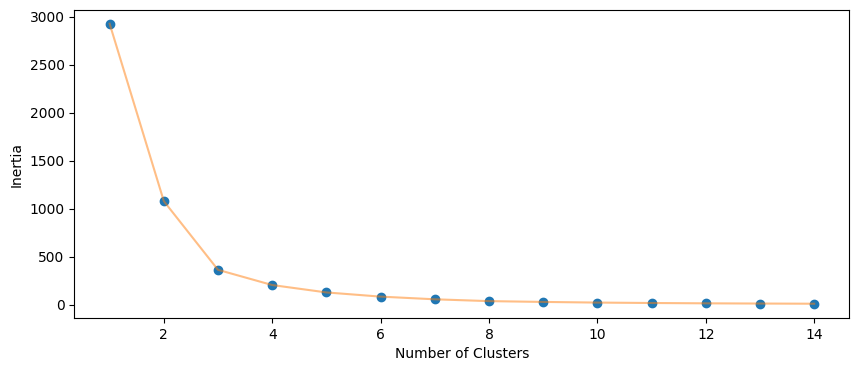

In [46]:
plt.figure(1 , figsize = (10 ,4))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [47]:
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [48]:
h = 0.02
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

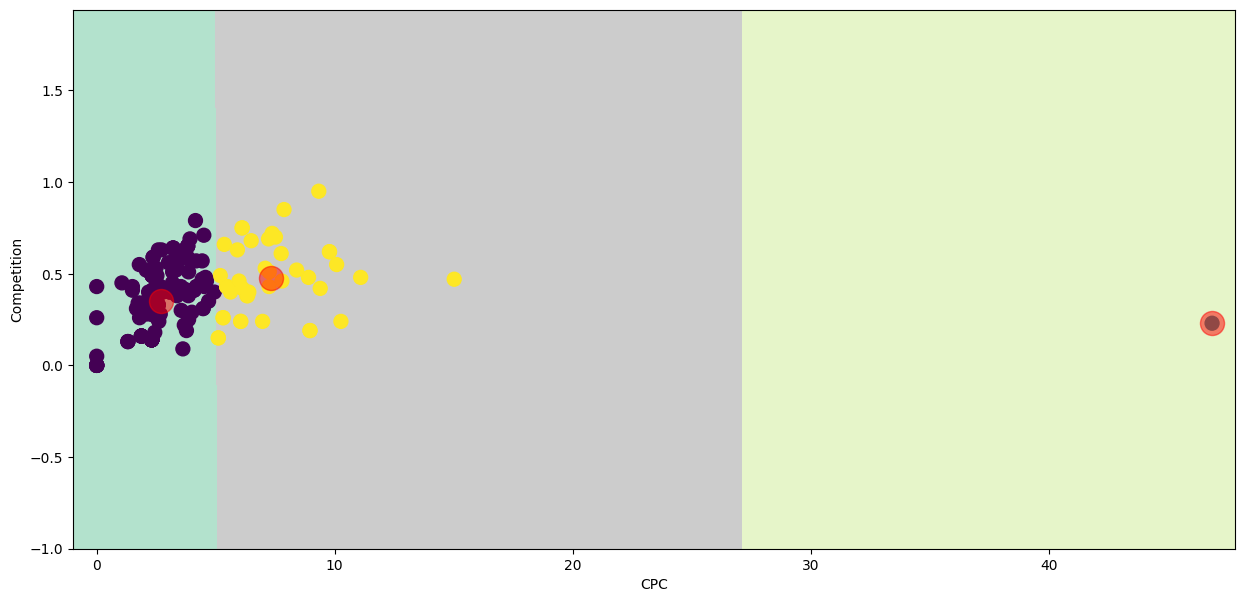

In [49]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'CPC', y = 'Competition', data = data1, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Competition') , plt.xlabel('CPC')
plt.show()